# Feature Engineering


The following tutorial contains examples of Python code for feature engineering. 
You should refer to the "Feature Engineering" Lecture Note in Week 6.

Read the step-by-step instructions below carefully. 
To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 1. Feature Selection - Univariate feature selection

Recall the iris dataset has four features and one class:

- feature 1: sepal length in centimeters

- feature 2: sepal width in centimeters

- feature 3: petal length in centimeters

- feature 4: petal width in centimeters

- class (Setosa, Versicolour, Virginica) 

In this tutorial, you will learn how to:

- Conduct univariate feature selection algorithm.

- Conduct recursive feature elimination algorithm.

- Conduct PCA feature reduction algorithm.


### **1.0** *Univariate Feature Selection.* 
### Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

Source_link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html 

If you want to learn more about the Univariate Feature Selection models, please go to the source link:
https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection 

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

SelectKBest removes all but the top K highest scoring features

**<font color='red'>Code:</font>** The following code identify the algorithm SelectKBest from sklearn library.

In [1]:
from sklearn.feature_selection import SelectKBest   #the "SelectKBest" removes all but the top K highest scoring features
from sklearn.feature_selection import chi2,f_classif 
# these are two selection criterias
# the "f_classif" Computes the ANOVA F-value for the provided sample.
# the "chi2" computes chi-squared stats between each non-negative feature and class.
import pandas as pd

### 1.1 Load your Raw Data

**<font color="red">Code:</font>**

In [2]:
iris = pd.read_csv('iris.txt',header=None)   #we load the data but the data does not have table head
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class'] #so we set the column names as this list of texts. 
#you may try removing this "iris.columns" and see. what you can get.

iris#you get a dataset of 150 objects and 4 features

,sepal-L,sepal-W,petal-L,petal-W,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.2 Identify your features and target

In [4]:
features=['sepal-L','sepal-W','petal-L','petal-W']  #here we set a feature list to be selected from the data table 
target=['class'] # the column "class" will be selected as the target variable.
X=iris[features] # using this code, we define a variable "X" to store the feature set. 
#Please note the "feature" in "iris[feature]" represents the feature definded in the first row. 
#"features=['sepal-L','sepal-W','petal-L','petal-W']"

y=iris[target] # similar to getting "X", we get the "y" from the target column ("class")
display(X)

,sepal-L,sepal-W,petal-L,petal-W
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


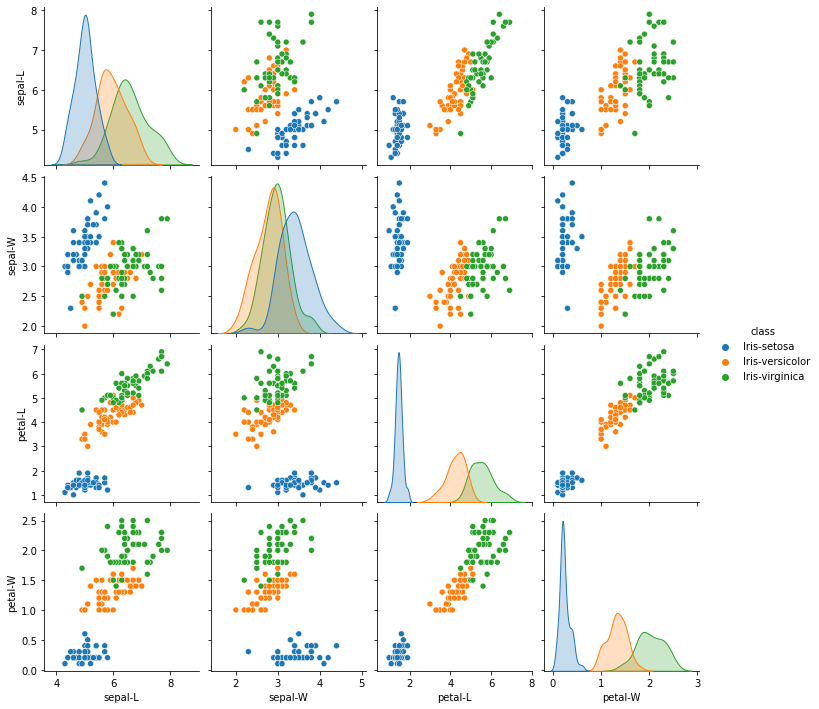

In [5]:
import seaborn as sns

sns.pairplot(iris, hue="class")

### 1.3 select the TWO most representative features from the 4 features using measurement Chi2. The *SelectKBest* is the algorithm you pick from the library.
The *chi2* is the measurement, you can change it to *f_classif* (ANOVA f-value).
The *k=2* is the number of optimal features you select from the complete set.

**<font color="red">Code:</font>**

In [6]:
#Step 1: define a feature selection model and specify the parameters
my_model=SelectKBest(chi2, k=2)   #you can see this model has two critical parameters: 
# "chi2" is used to determine the selection criteria, you can change it to "f_classif";
# "k=2" indicates how many features will be selected.

#Step 2: use the model to fit the data and transform the feature set "X" to a new selected feature "X_new"
X_new=my_model.fit_transform(X,y) 

X_new.shape # you get a new feature set of dimension k=2

(150, 2)

### 1.4 Check the selected features

For detailed numpy array operation:
https://numpy.org/doc/stable/reference/generated/numpy.array.html 

In [8]:
display(X_new[0:5,:])  # this code display the first five rows and all columns of X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 2. Feature Selection - use Wrapper model to measure feature importance

**1.** Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 


**<font color="red">Code:</font>** The following code identify the algorithm SelectFromModel from sklearn library. This is a kind of Wrapper model. The algorithm select for feature importance measurement is ExtraTreesClassifier.

Please read the documentation here:
https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model 

In [9]:
from sklearn.ensemble import ExtraTreesClassifier  # "ExtraTreesClassifier" is a learning model from library "ensemble"
# We will learn this model in the section of classification. It is used for data classification.

from sklearn.feature_selection import SelectFromModel # "SelectFromModel" is the wrapper model we are going to learn.

### 2.1 We will generate the dataset

**<font color="red">Code:</font>**

In [23]:
iris = pd.read_csv('iris.txt',header=None) # Now we are repeating the same step. Please check 1.2 for details
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
features=['sepal-L','sepal-W','petal-L','petal-W']
target=['class']
X=iris[features]
y=iris[target]
X=X.values
y=y.values.ravel()  #please note y is a one-dimensional data, we need to use ravel() to reshape it to (n,)
#You may try removing this "ravel()" and see what will happen.
#Details: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

In [24]:
y.shape
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

### 2.2 We identify a classifier and use the classifier to measure feature importance

In [25]:
clf = ExtraTreesClassifier(n_estimators=50) #get the model from library.
#this is the learning model that you will use to evaluate the importance of different features.

clf = clf.fit(X,y) #fit your data.
clf.feature_importances_ # now we can get the feature importance score from model
#please note this is the relative feature importance based on how accurate the learning model is.

array([0.1173653 , 0.05748375, 0.36937833, 0.45577262])

### 2.3 select your feature subset from SelectFromModel

reference: https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model 

**<font color="red">Code:</font>**

In [26]:
selection = SelectFromModel(clf, prefit=True) #In order to run the feature selection model "SelectFromModel", we need two parameters:
# the learning algorithm "clf", which is defined and fitted using the data in step 2.2
# the parameter "prefit" checks whether a prefit model is expected to be passed into the constructor directly or not. 
# If True, transform must be called directly.
# Otherwise train the model using fit and then transform to do feature selection. (similar to 1.3)

X_new=selection.transform(X) # now we transform X to X_new
X_new.shape

(150, 2)

### 2.3.0 here I provide an alternative way to call the SelectFromModel by repeating 1.3  

In [27]:
clf = ExtraTreesClassifier(n_estimators=50)
my_model=SelectFromModel(clf)   
X_new=my_model.fit_transform(X,y)
X_new.shape

(150, 2)

## 3.3. Feature Reduction - Principle Component Analysis (PCA)

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

**<font color="red">Code:</font>** we first get PCA algorithm from the library and then map the 4-dimensional feature set into a 2-dimensional feature set:

Source: https://scikit-learn.org/stable/modules/decomposition.html#pca

In [28]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA #Model "PCA" from library "sklearn.decomposition" is the model we need

We map it to a two dimensional space

**<font color="red">Code:</font>**

In [29]:
iris = pd.read_csv('iris.txt',header=None) # Same as 1.2
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
features=['sepal-L','sepal-W','petal-L','petal-W']
X=iris[features]

In [30]:
pca = PCA(n_components=2) # we select PCA algorithm with 2 dimensions
pca = pca.fit(X) # same as 1.3
z = pca.transform(X)

In [31]:
pca = PCA(n_components=2) # Alternatively, you can use the "fit_transform" directly to do the previous block.
z=pca.fit_transform(X)

In [32]:
display(z[:5,:])

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [33]:
iris['z1']=z[:,0] # here we add a new column "z1" to the data table. The column is from the table "z" first column
iris['z2']=z[:,1] # get the second column of table "z" and add it to a new column "z2" to table "iris"
iris.head()

,sepal-L,sepal-W,petal-L,petal-W,class,z1,z2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


We scatter plot the data in a the new space of z

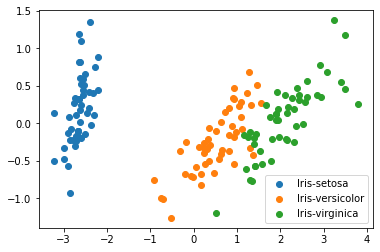

In [34]:
import matplotlib.pyplot as plt # Please check tutorial 2 for details.
groups = iris.groupby("class")
for name, group in groups:
    plt.scatter(group['z1'],group['z2'], marker="o", label=name)
plt.legend()
plt.show()

# Assignment - Due in Week 8


## 1. use f_classif as your evaluation measurement and redo the feature selection in Univariate feature selection. what does "f_classif" represent? Is this a filter model or wrapper model? (10 points). 

## 2. Explain the differences among univariate feature selection, SelectFromModel method, and PCA. (10 points)


## 3. Read documentation of "SequentialFeatureSelector" and use it to select the top TWO features. What is the mechnism of this tool? What are these two optimal features? (40 points)

document: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

## 4. Find a new dataset and use ONE of the templates to do feature selection or reduction. Reduce the data dimension to Two. Please scatter plot your optimal feature set and interpret. (40 points)


## Download your jupyter notebook as HTML and upload to Canvas (including your name and datetime).

**<font color='blue'>References:</font>**

1. Sklearn library. https://scikit-learn.org/stable/
2. Matplotlib. https://matplotlib.org/
3. Seaborn. https://seaborn.pydata.org/